# Phase de prétraitement

In [1]:
#importation du dataset a l'aide de pandas
import pandas as pd
df = pd.read_csv("titanic-passengers.csv", encoding = "iso.8859-1", sep=";")
#affichage de l'en-tête
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
#affichage des informations générales sur les colonnes de données et les valeur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [3]:
#recherche des informations manquantes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [5]:
#remplissage par la moyenne
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [6]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [8]:
#remplissage par le mode
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

In [9]:
df['Cabin'].describe()

count         891
unique        147
top       B96 B98
freq          691
Name: Cabin, dtype: object

In [10]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
#remplissage par le mode
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [12]:
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [13]:
#vérification
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Phase de visualisation

<AxesSubplot:>

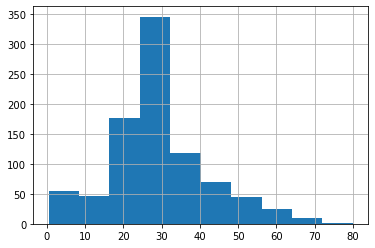

In [14]:
#étude la distribution des caractéristiques les plus importantes en fonction de votre compréhension del'ensemble de données et du problème
import seaborn as sns
df['Age'].hist()

<AxesSubplot:>

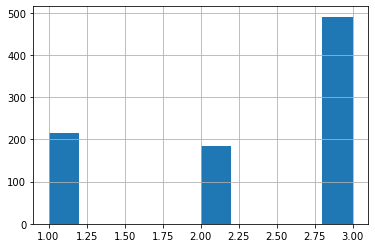

In [15]:
df['Pclass'].hist()

<AxesSubplot:>

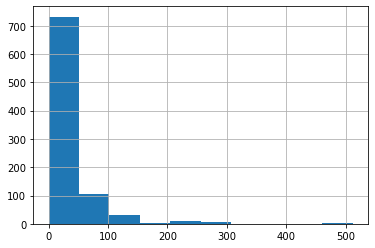

In [16]:
df['Fare'].hist()

<AxesSubplot:>

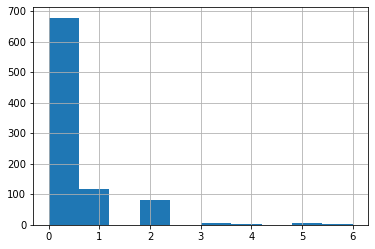

In [17]:
df['Parch'].hist()

In [18]:
#encodage
df['Survived'].replace({'Yes':1, 'No':0}, inplace=True)
df['Sex'].replace({'male':1, 'female':0}, inplace=True)

In [19]:
#Corrélation sexe
df['Sex'].corr(df['Survived'])

-0.5433513806577549

In [20]:
#Corrélation age
df['Age'].corr(df['Survived'])

-0.06980851528714312

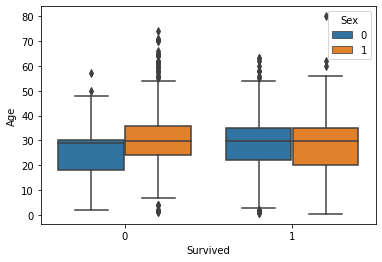

In [21]:
#Visualisation de la corrélation entre le sexe et l'âge dans un graphique de votre choix
import seaborn as sns
ax = sns.boxplot(x=df['Survived'], y=df['Age'], hue='Sex', data=df)

In [22]:
#Choisissez deux autres caractéristiques et étudiez leur impact sur la survie des individus.
#Corrélation Pclass
df['Pclass'].corr(df['Survived'])

-0.3384810359610153

In [23]:
#Corrélation Fare
df['Fare'].corr(df['Survived'])

0.25730652238496243

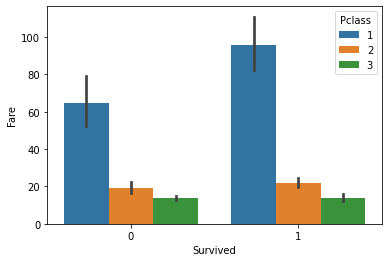

In [24]:
#Visualisation de la corrélation entre le sexe et l'âge dans un graphique de votre choix
import seaborn as sns
ax = sns.barplot(x=df['Survived'], y=df['Fare'], hue='Pclass', data=df)

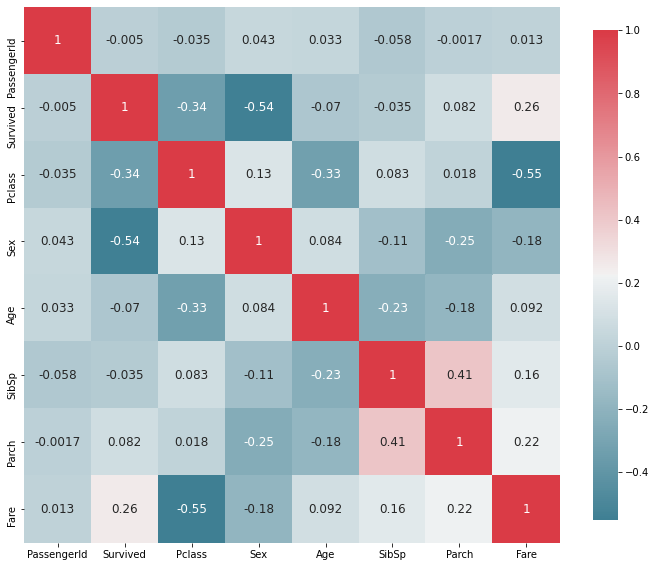

In [33]:
import matplotlib.pyplot as plt
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )

In [26]:
#analyse de ce que fait exactement le code et ses utilités 
the heatmap gives a measure of the intensity and direction of the linear relationship between two variables.
The correlation coefficient is between -1 and 1.
The closer the coefficient is to 1, the stronger the positive linear relationship between the variables.
The closer the coefficient is to -1, the stronger the negative linear relationship between the variables.
The closer the coefficient is to 0, the weaker the linear relationship between the variables.



In [27]:
#Utilisez la fonction groupby combinée avec la moyenne () pour afficher la relation entre Pclass et survécu
df.groupby(["Pclass", "Survived"]).mean()

PassengerId       Sex        Age     SibSp     Parch  \
Pclass Survived                                                         
1      0          410.300000  0.962500  40.896074  0.287500  0.300000   
       1          491.772059  0.330882  34.784615  0.492647  0.389706   
2      0          452.123711  0.938144  33.266947  0.319588  0.144330   
       1          439.080460  0.195402  26.076166  0.494253  0.643678   
3      0          453.580645  0.806452  27.417500  0.672043  0.384409   
       1          394.058824  0.394958  23.232689  0.436975  0.420168   

                      Fare  
Pclass Survived             
1      0         64.684008  
       1         95.608029  
2      0         19.412328  
       1         22.055700  
3      0         13.669364  
       1         13.694887

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,B96 B98,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,B96 B98,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,B96 B98,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,B96 B98,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,B96 B98,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,B96 B98,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,B96 B98,S


In [29]:
#suppression des colonnes inutiles
df_name=df['Name']
df = df.drop('Name', axis=1)

In [30]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,1,28.000000,0,0,248740,13.0000,B96 B98,S
1,76,0,3,1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,1,20.000000,0,0,350050,7.8542,B96 B98,S
3,568,0,3,0,29.000000,0,4,349909,21.0750,B96 B98,S
4,672,0,1,1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.000000,1,0,237736,30.0708,B96 B98,C
887,61,0,3,1,22.000000,0,0,2669,7.2292,B96 B98,C
888,535,0,3,0,30.000000,0,0,315084,8.6625,B96 B98,S
889,102,0,3,1,29.699118,0,0,349215,7.8958,B96 B98,S


In [31]:
# créer une nouvelle colonne appelée Titre qui contient le titre approprié pour chaque individu
df['Title']=df_name
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,1,28.000000,0,0,248740,13.0000,B96 B98,S,"Collander, Mr. Erik Gustaf"
1,76,0,3,1,25.000000,0,0,348123,7.6500,F G73,S,"Moen, Mr. Sigurd Hansen"
2,641,0,3,1,20.000000,0,0,350050,7.8542,B96 B98,S,"Jensen, Mr. Hans Peder"
3,568,0,3,0,29.000000,0,4,349909,21.0750,B96 B98,S,"Palsson, Mrs. Nils (Alma Cornelia Berglund)"
4,672,0,1,1,31.000000,1,0,F.C. 12750,52.0000,B71,S,"Davidson, Mr. Thornton"
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.000000,1,0,237736,30.0708,B96 B98,C,"Nasser, Mrs. Nicholas (Adele Achem)"
887,61,0,3,1,22.000000,0,0,2669,7.2292,B96 B98,C,"Sirayanian, Mr. Orsen"
888,535,0,3,0,30.000000,0,0,315084,8.6625,B96 B98,S,"Cacic, Miss. Marija"
889,102,0,3,1,29.699118,0,0,349215,7.8958,B96 B98,S,"Petroff, Mr. Pastcho (""Pentcho"")"


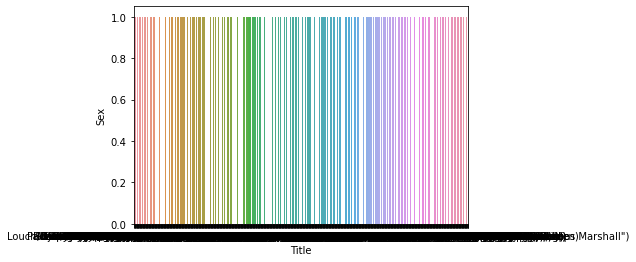

In [38]:
#Visualisez la corrélation entre le titre et sexe
sns.barplot(x = 'Title',
            y = 'Sex',
            data = df)
plt.show()